In [2]:
#Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
#from sqlalchemy import create_engine, text
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
h_measurement=Base.classes.measurement
h_station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [9]:
first_row_m=session.query(h_measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22af1656500>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [10]:
#Esto es para que te traiga que columnas tiene. No se ocupa cuando voy a ver un dato puntual
first_row_s=session.query(h_station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22af1656650>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(h_measurement.date).\
    order_by(h_measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


c:\Users\sebat\anaconda3\envs\dev\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


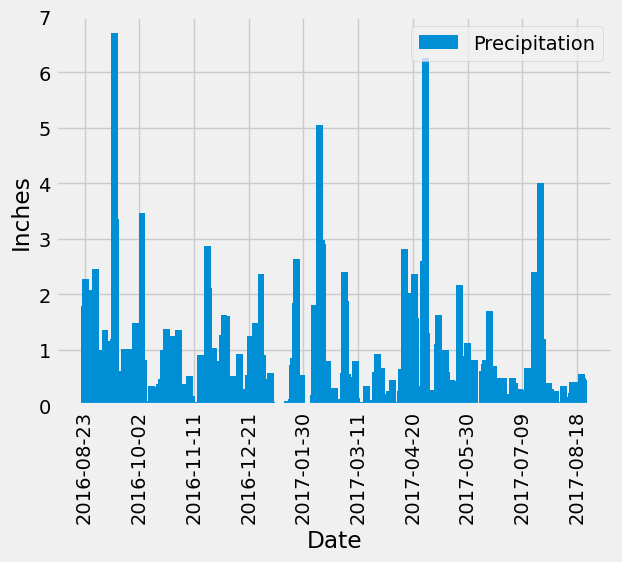

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
date=dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
one_year_before = date - dt.timedelta(days=365)
#print(one_year_before)

# Perform a query to retrieve the data and precipitation scores
data_prep = session.query(h_measurement.date,h_measurement.prcp).\
    filter(h_measurement.date >= one_year_before).all()
#print(data_prep)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_rows = pd.DataFrame({"Date":result[0],"Precipitation":result[1]} for result in data_prep)
#print(prcp_rows)

print(type(prcp_rows.Date[0]))
prcp_rows["Date"]= pd.to_datetime(prcp_rows["Date"])
print(type(prcp_rows.Date[0]))

#prcp_rows.head()

# Sort the dataframe by date
#prcp_data = prcp_rows.sort_value(by=prcp_rows["Date"],ascending=True)
#print(prcp_data)
data_prcp=prcp_rows.sort_values("Date", ascending=True)
data_prcp.head()

# Use Pandas Plotting with Matplotlib to plot the data


plt.bar(data_prcp["Date"],data_prcp["Precipitation"],width=5)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(np.arange(one_year_before,date,step=40),rotation=90)
plt.legend(labels=["Precipitation"])
plt.ylim(0,7)
plt.show()


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_rows.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_station= session.query(func.count(h_station.id)).all()
total_station

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_active=session.query(h_measurement.station,func.count(h_measurement.date)).\
    group_by(h_measurement.station).\
    order_by(func.count(h_measurement.date).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
#here i find the temperatures of the statin with more activity
temp=session.query(h_measurement.tobs).\
    filter(h_measurement.station == station_active[0][0]).all()
temp

[(70.0,),
 (62.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (69.0,),
 (66.0,),
 (70.0,),
 (75.0,),
 (64.0,),
 (60.0,),
 (61.0,),
 (68.0,),
 (64.0,),
 (66.0,),
 (67.0,),
 (70.0,),
 (67.0,),
 (67.0,),
 (69.0,),
 (60.0,),
 (75.0,),
 (75.0,),
 (65.0,),
 (75.0,),
 (69.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (72.0,),
 (67.0,),
 (65.0,),
 (64.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (69.0,),
 (66.0,),
 (69.0,),
 (61.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (66.0,),
 (71.0,),
 (61.0,),
 (68.0,),
 (67.0,),
 (62.0,),
 (65.0,),
 (69.0,),
 (63.0,),
 (62.0,),
 (61.0,),
 (64.0,),
 (72.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (71.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (74.0,),
 (67.0,),
 (68.0,),
 (64.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (67.0,),
 (64.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (75.0,),


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(h_measurement.tobs),func.max(h_measurement.tobs),func.avg(h_measurement.tobs)).\
    filter(h_measurement.station == station_active[0][0]).all()


[(54.0, 85.0, 71.66378066378067)]

In [18]:
#here, i find the most recent date of the station with more activity
date_recent_obs=session.query(h_measurement.date).\
    filter(h_measurement.station == station_active[0][0]).\
    order_by(h_measurement.date.desc()).first()
date_recent_obs


('2017-08-18',)

In [19]:
date=dt.date(2017,8,18)

# Calculate the date one year from the last date in data set.
one_year_before_2 = date-dt.timedelta(days=365)
print(one_year_before_2)

# Perform a query to retrieve the data and precipitation scores
data_prep_2 = session.query(h_measurement.tobs).\
    filter(h_measurement.station == station_active[0][0]).\
    filter(h_measurement.date >= one_year_before_2).all()

#data_prep_2

2016-08-18


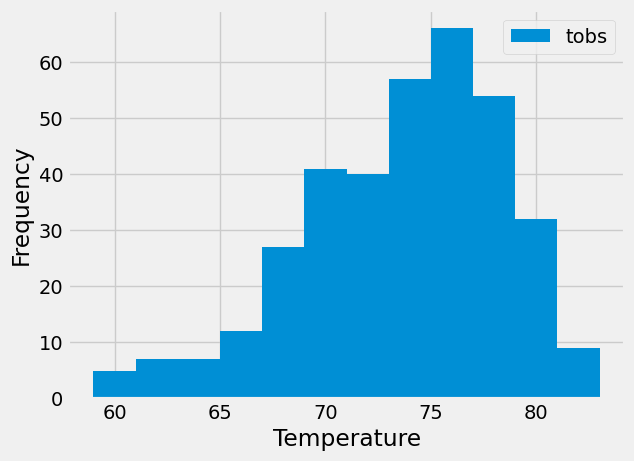

In [20]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_rows_2 = pd.DataFrame({"tobs":result[0]} for result in data_prep_2)
prcp_rows_2

# Use Pandas Plotting with Matplotlib to plot the data
prcp_rows_2.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [21]:
session.close()